# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 15 баллов
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 5 &mdash; 25 баллов
* Задача 6 &mdash;  40 баллов

-----

In [ ]:
# Bot check

# HW_ID: phds_hw5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [190]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

### <b><i><font color="blue">Легкая часть</font></i></b> 

### Задача 1.

**1.** Найдите оценку параметра $\theta$ методом максимального правдоподобия по выборке размера $n$ из распределения $\mathcal{N}(a,\sigma^2)$ для трех различных случаев
- $\theta = (a, \sigma^2)$;
- $\theta = \sigma^2$, причем $a$ известно;
- $\theta = a$, причем $\sigma^2$ известно.

Для последнего случая посчитайте асимптотическую дисперсию оценки по теореме из лекции.

**2.** Найдите оценку параметра $\theta$ методом максимального правдоподобия по выборке размера $n$ из распределения $\mathrm{Pois}(\theta)$. Посчитайте асимптотическую дисперсию по теореме из лекции, если оценка является асимптотически нормальной.

In [191]:
grid_loc = np.linspace(-5, 5, 100)
grid_scale = np.linspace(0.1, 5, 100)
grid = np.array([[i, j] for i in grid_loc for j in grid_scale])
sample = sps.norm(loc = 1, scale = 2).rvs(size = 1000)
sample = np.array(sample)[np.newaxis, :]

alpha = sps.norm(loc = grid[:, 0].reshape(-1,1), 
                         scale = np.sqrt(grid[:, 1].reshape(-1,1))).logpdf(sample).sum(axis = 1)
index = np.argmax(alpha)
theta = grid[index, :]
print("theta = ", theta)

theta =  [0.85858586 4.25757576]


In [192]:
alpha = sps.norm(loc = 1, 
                         scale = np.sqrt(grid[:, 1].reshape(-1,1))).logpdf(sample).sum(axis = 1)
index = np.argmax(alpha)
theta = grid[index, 1]
print("theta = ", theta)

theta =  4.257575757575758


In [193]:
alpha = sps.norm(loc = grid[:, 0].reshape(-1,1), 
                         scale = 1).logpdf(sample).sum(axis = 1)
index = np.argmax(alpha)
theta = grid[index, 0]
print("theta = ", theta)

theta =  0.8585858585858581


---
### Задача 2.
Пусть $X_1,...,X_n$ &mdash;  выборка из категориального распределения, то есть $\mathsf{P}_\theta(X_1 = j) = \theta_j$ для $j \in \{1, ..., k\}$, причем $\theta = (\theta_1, ..., \theta_k), \theta_j \geqslant 0$ и $\theta_1 + ... + \theta_k = 1$. Найдите оценку максимального правдоподобия параметра $\theta$ и проверьте ее на состоятельность.

---
### Задача 3.


**Профиль Физика**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/fedesoriano/cern-electron-collision-data">данные</a> столкновениях частиц и оставьте следующие признаки:
* `E1`, `E2` &mdash; полная энергия электронов (ГэВ);
* `M` &mdash; инвариантная масса двух электронов (ГэВ).

**Профиль Биология**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/ruslankl/mice-protein-expression">данные</a> экспрессии белков у белых мышей и оставьте следующие белки для анализа:
* `ITSN1_N`
* `DYRK1A_N` 
* `ELK_N`

**Профиль Химия**

Выберите любой вариант выше.

---


**1.** Постройте для каждого из признаков гистограммы. Что можно сказать о характере распределения?


In [194]:
df = pd.read_csv("dielectron.csv") 

In [195]:
columns = ['E1', 'E2', 'M']  

df_chosen_columns = df[columns]

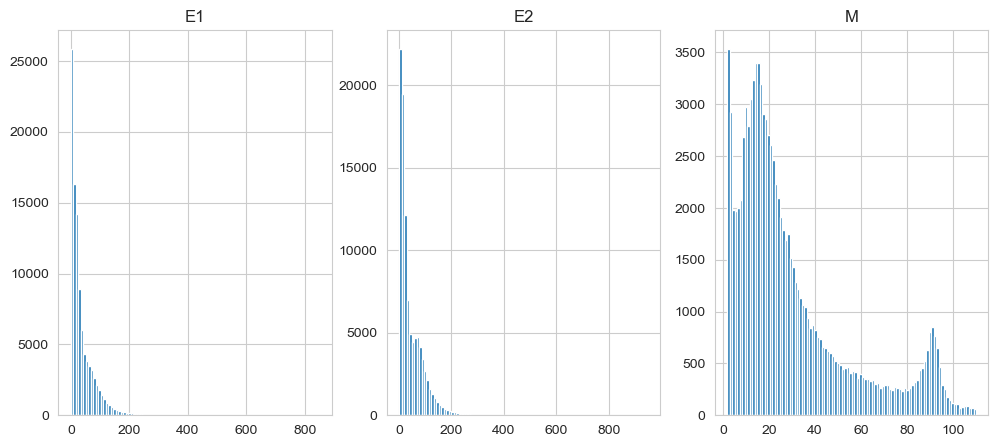

In [196]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

for i, column in enumerate(columns):
    axs[i].hist(df_chosen_columns[column], bins=100)
    axs[i].set_title(column)

plt.show()

**Ответ:** похоже на экспоненциальное распределение

In [210]:
clear = dict()
for col in columns:
    sample = df[col]
    sample = sample.dropna()
    if col in ['E1','E2']:
        sample = sample[sample < 300]
    clear[col] = sample
print(np.array(clear['E1']))

[58.7141   6.61188 25.5419  ...  4.18566 54.4622   7.64   ]


**2.** Пусть есть выборка $X_1, ..., X_n$. Опишите процедуру бутстрепа построения доверительного интервала для величины $\theta = \mathsf{E} X_1$. Рассмотрите три типа  бутстрепных доверительных интервалов, выпишите формулу для каждого из них.


**Описание:** 1) выбор случайных элементов из выборки
2) генерация выборки из этих случайных элементов
3) процедуру генерации выборок повторяем B раз
4) для каждой выборки посчитаем значение средних
5) вычисляем бутстрепную оценку 
6) строим доверительные интервалы

**3.** Реализуйте функцию вычисления выборки оценок $\theta^*_1, \ldots \theta^*_B$ для оценки $\widehat \theta$ методом бутстрепа. Функция должна принимать на вход выборку и количество бутстрепных выборок $B$. 

In [212]:
def estimator(sample):
    '''
    Делает необходимые преобразования с выборкой (выполняет подсчет статистики).
    Используется в функции bootstrap для вычисления оценок.
    
    :param sample: массив с числами
    :return: оценка, посчитанная по выборке
    '''
    sample = sample.mean()
    return sample

def bootstrap(sample, B=100_000):
    '''
    Реализует процедуру бутстрепа.
    
    :param sample: исходная выборка, по которой будут вычисляться бутстрепные оценки
    :param B: число бутстрепных оценок
    :return: возвращает массив длины B c бутстрепными оценками
    '''

    n = len(sample)  # длина выборки
    bootstrap_means = [] 
    
    for b in range(B):
        ind = np.random.randint(n, size = n)
        bsample = np.array([sample[i] for i in ind])
        current_mean = estimator(bsample)
        bootstrap_means.append(current_mean)
    return np.array(bootstrap_means)

**4.** Реализуйте три типа бутстрепных доверительных интервалы в виде функций, принимающих на вход выборку оценок, полученных с помощью бутстрепа. Реализовывать вычисление бутстрепных интервалов для подвыборок размера от 1 до n не нужно, только для всей выборки. 

In [215]:
def boostrap_normal_confidence_interval(bootstrap_estimations, sample_mean, alpha=0.95):
    inter = sps.norm().ppf((1 + 0.95) / 2) * np.sqrt(np.mean(bootstrap_estimations**2) - np.mean(bootstrap_estimations)**2)
    return (sample_mean - inter, sample_mean + inter)

def boostrap_central_confidence_interval(bootstrap_estimations, sample_mean, alpha=0.95):
    b = np.sort(bootstrap_estimations)
    left= b[int(np.floor(len(b) * (1 + alpha) / 2))]
    right = b[int(np.ceil(len(b) * (1 - alpha) / 2))]
    return (2 * sample_mean - left, 2 * sample_mean - right)
    
def boostrap_quantile_confidence_interval(bootstrap_estimations, sample_mean, alpha=0.95):
    b = np.sort(bootstrap_estimations)
    right = b[int(np.floor(len(b) * (1 + alpha) / 2))]
    left = b[int(np.ceil(len(b) * (1 - alpha) / 2))]
    return (left, right)

**5.** Для каждого признака постройте бутстрепные доверительные интервалы для $\theta = \mathsf{E} X_1$ и сравните их.

In [223]:
for i, column in enumerate(columns):
    sample = np.array(clear[column])
    bootstrap_estimations = bootstrap(sample, B=100)
    d1 = boostrap_normal_confidence_interval(bootstrap_estimations, estimator(sample),alpha=0.95)
    d2 = boostrap_central_confidence_interval(bootstrap_estimations, estimator(sample),alpha=0.95)
    d3 = boostrap_quantile_confidence_interval(bootstrap_estimations, estimator(sample), alpha=0.95)
    print(column, ": ", d1, " ", d2, " ", d3)

E1 :  (35.85910499604824, 36.36782834411833)   (35.88556596441585, 36.41020288801249)   (35.816730452154076, 36.34136737575072)
E2 :  (43.18323409052658, 43.72266392856494)   (43.12031839314873, 43.76671465079383)   (43.139183368297694, 43.785579625942795)
M :  (29.862559004235237, 30.176483559143634)   (29.872603028073865, 30.166149860381328)   (29.872892702997543, 30.166439535305006)


**Вывод:** они все отличаются лишь на десятые/тысячные друг от друга

---

### Задача 4.
В данной задаче нужно исследовать бутстрепные доверительные интервалы на примере гамма-распределения $\Gamma(\alpha, \beta)$ для величины $\mathsf{E}_{\theta} X_1 = \frac{\beta}{\alpha}$.


**1.** Сгенерируйте реализации выборки из $\Gamma(3, 2)$ размеров 5 и 100 и выведите реализации вышеупомянутых доверительных интервалов для этих двух реализаций. Сделайте **выводы**.

*Замечания.*

1. Исходная выборка, по которой затем будут считаться бутстрепные оценки, генерируется один раз.
2. Процедуру бутстрепа для подсчета бутстрепных доверительных интервалов нужно выполнять один раз.

In [222]:
sample_5 = sps.gamma(a = 3, scale = 1/2).rvs(size = 5)
bootstrap_estimations = bootstrap(sample_5, B=100_000)
d1 = boostrap_normal_confidence_interval(bootstrap_estimations, estimator(sample_5),alpha=0.95)
d2 = boostrap_central_confidence_interval(bootstrap_estimations, estimator(sample_5),alpha=0.95)
d3 = boostrap_quantile_confidence_interval(bootstrap_estimations, estimator(sample_5), alpha=0.95)
print( "5 : ", d1, " ", d2, " ", d3)

sample_100 = sps.gamma(a = 3, scale = 1/2).rvs(size = 100)
bootstrap_estimations = bootstrap(sample_100, B=100_000)
d1 = boostrap_normal_confidence_interval(bootstrap_estimations, estimator(sample_100),alpha=0.95)
d2 = boostrap_central_confidence_interval(bootstrap_estimations, estimator(sample_100),alpha=0.95)
d3 = boostrap_quantile_confidence_interval(bootstrap_estimations, estimator(sample_100), alpha=0.95)
print( "100 : ", d1, " ", d2, " ", d3)

5 :  (1.059064065263145, 2.1638378405665777)   (1.0806779798943849, 2.171323272022339)   (1.0515786338073836, 2.1422239259353377)
100 :  (1.27164536071221, 1.611399028858475)   (1.2685890896205307, 1.606559993623165)   (1.27648439594752, 1.6144552999501542)


**2.** Сравним все три типа интервалов. Во-первых, мы хотим, чтобы реальный уровень доверия этих доверительных интервалов был бы не менее 0.95. Это необходимое условие, при котором доверительный интервал корректно рассматривать. Во-вторых, мы хотим получить доверительный интервал как можно меньшей длины.

Сгенерируйте $10^4$ выборок размера 5 из распределения $\Gamma(3, 2)$. 

In [231]:
sample_huge = sps.gamma(a = 3, scale = 1/2).rvs(size = (10**4, 5))

По каждой выборке посчитайте выборку оценок методом бутстрепа с $B = 10^5$. 

*Предупреждение*: код может работать долго, особенно при неоптимальной реализации.

In [ ]:
b_est = [bootstrap(sample_huge[i], B=10**5) for i in range(10**4)]

Посчитайте реализации всех доверительных интервалов.

In [ ]:
d = np.zeros((10**4, 3))
for i in range(10**4):
    d1 = boostrap_normal_confidence_interval(b_est, estimator(sample_huge),alpha=0.95)
    d2 = boostrap_central_confidence_interval(b_est, estimator(sample_huge),alpha=0.95)
    d3 = boostrap_quantile_confidence_interval(b_est, estimator(sample_huge), alpha=0.95)
    d[i] = [d1, d2, d3]

По полученным реализациям посчитайте
* оценку реального уровня доверия &mdash; долю реализаций исходных выборок, для которых истинное значение оцениваемого параметра попадает в реализацию доверительного интервала;
* среднюю длину реализаций доверительных интервалов.

In [ ]:
trusts = []
for di in range(3):
    for j in range(10**4):
        trust = sum(True for i in b_est[j] if (i <= d[j][di][1] and i>=d[j][di][0]))/5
        trusts.append(trust)

**3.** Повторите эксперимент для выборок размера 100.

In [ ]:
sample_huge = sps.gamma(a = 3, scale = 1/2).rvs(size = (10**4, 100))
b_est = [bootstrap(sample_huge[i], B=10**5) for i in range(10**4)]
d = np.zeros((10**4, 3))
for i in range(10**4):
    d1 = boostrap_normal_confidence_interval(b_est, estimator(sample_huge),alpha=0.95)
    d2 = boostrap_central_confidence_interval(b_est, estimator(sample_huge),alpha=0.95)
    d3 = boostrap_quantile_confidence_interval(b_est, estimator(sample_huge), alpha=0.95)
    d[i] = [d1, d2, d3]
    
trusts = []
for di in range(3):
    for j in range(10**4):
        trust = sum(True for i in b_est[j] if (i <= d[j][di][1] and i>=d[j][di][0]))/100
        trusts.append(trust)

Сделайте общие **выводы** по задаче.

**Вывод:** оценка реального уровня доверия увеличилась

---
### <b><i><font color="orange">Сложная часть</font></i></b> 

### Задача 5.
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, который излучает безмассовых $\gamma$-котиков, причем направления траекторий $\gamma$-котиков случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-котиков с поверхностью детекторной плоскости.
- Найдите оценку максимального правдоподобия параметра $\theta$ для $n=1$ и $n=2$.
- Найдите асимптотическую дисперсию, которую может обещать теорема о свойствах ОМП. Что мешает применить эту теорему? Сравните с оценкой с помощью выборочной медианы.

### Задача 6.


Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;

а также, по каждой из этих оценок, одношаговую оценку. 

*Напоминание:* если $\widehat{\theta}_0$ — асимптотически нормальная оценка, то одношаговая оценка $\widehat{\theta}_1$ вычисляется как $\widehat{\theta}_1 = \widehat{\theta}_0 - \left(\ell''_X(\widehat{\theta}_0) \right)^{-1} \ell'_X(\widehat{\theta}_0)$, где $\ell_X(\theta)$ — логарифмическая функция правдоподобия. Заметим, что обычное выборочное среднее не является асимптотически нормальной оценкой, и оценка, вычисленная по формуле выше, формально не является одношаговой, однако ее все равно требуется посчитать.

На одном графике изобразите зависимость значений этих оценок от $n$. Для каждой оценки $\widehat{\theta}_0$ соответствующая оценка $\widehat{\theta}_1$ должна быть изображена на графике пунктиром тем же цветом, что и $\widehat{\theta}_0$. 

Сравните асимптотические дисперсии оценок. 

*Замечание:* если некоторые оценки имеют большой разброс, и разница между графиками зависимостей оценок с малыми значениями недостаточно заметна, стоит сделать два графика, на одном из которых будут изображены все оценки, а на втором &mdash; только достаточно хорошие.


In [ ]:
n = 1000
grid = np.arange(n) + 1
sample = sps.cauchy.rvs(size=n)
estimation_mean = np.cumsum(sample) / grid

In [ ]:
def cauchy_one_step(sample, estimation):
    sample = sample - estimation
    d = 2 * np.sum(sample / (1 + sample ** 2))
    dd = -2 * np.sum((1 - sample ** 2) / (1 + sample ** 2) ** 2)
    return estimation - d / dd

**Вывод:**